# Practical Linear Algebra for Data Science

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy.stats import pearsonr
import scipy

###### ============================
# Chapter 6
## Matrices - 2

#### Frobenius Norm (Euclidean Norm)

$$||A||_{F} = \sqrt{\sum \limits_{i=1}^{M} \sum \limits_{j=1}^{N} a_{ij}^2}=\sqrt{tr(A^TA)}$$

#### $p$-Norm

$$||A||_{p} = ({\sum \limits_{i=1}^{M} \sum \limits_{j=1}^{N} |a_{ij}|^p})^{1/p}$$

###### ============================

### Trace

- Trace of a matrix is the sum of its diagonal elements, $tr(A)$.
- Trace is only for square matrices
- Trace of a matrix equals the sum of it's eigenvalues (and it's a measure of the volume of it's eigenspace)

$$||A||_F=\sqrt{tr(A^TA)}$$

###### ============================

### Matrix Space and Null Space

- Column space and Row Space:
- Column: $v_i$ is i-th column of matrix, then $C([v_1 v_2 ... v_n)=\lambda_1v_1+\lambda_2v_2+...+\lambda_nv_n$
- Row: same as above but for rows $R(A)$ and we have $R(A)=C(A^T)$ (and $R(A)=C(A)$ if $A$ is symmetric.

The <b><u><i>column space</i></u></b> can be summarized as $Ax=b$, and if there exits an $x \in R^n$ that can create a weighted combinaton of columns of $A$, then $b$ is in the column space of $A$ ($b \in C(A))$.

The <b><u><i>null space</i></u></b> can be summarized as $Ay=0$, and if there exits an $y \in R^n$ that can create a weighted combinaton of columns of $A$ is ZERO, then $y$ is in the null space of $A$ ($y \in N(A)$) $y \neq 0$.

<i><u><b>NOTE</i></u></b>: Full rank matrices have an empty nullspace. Reduced-Rank matrices have a nonempty null space

###### ============================

### Rank

Rank is related to the dimensionality of the matrix subspace. It is the largest number of columns (or rows) that for a linearly independet set.

$$r(A)=rank(A)$$

- Rank is nonnegative integer
- A matrix has a unique rank
- Maximum possible rank is equal or smaller than $\min(M,N)$
- A matrxi with maximum possible rank (i.e, $r(A)=\min(M,N)$) is full-rank
- A matrxi with less than maximum possible rank (i.e, $r(A)\leq\min(M,N)$) is singular or rank-reduced.
- if $\alpha \neq 0$, then rank of matrix does not change by scalar multiplication of $r(\alpha A)=r(A)$
- If you have a Matrix A Mxr with rank r and Matrix B rxN with rank r, then AB is MxN and has rank r. This way you can create a matrix with rank r.
- $A$, $A^T$, $A^TA$ and $AA^T$ all have the same rank

<i><u><b>Rank of Special Matrices</i></u></b>:

- Vectors = rank 1
- Zero Marices = rank 0
- Identity (NxN) = rank N
- Diagonal = rank is number of non zero elements on diag
- Triangular = is full-rank if there is no non-zero element on diag. Other than that, we need to calculate
- Random Matrices = Impossible to say. But if random by gaussian (np.random,.randn()), then it is full-rank.
- Shifted matrices = they have full-rank and it is one of the goals of shifting a matrix ($A \in R^{N.N}$, $r(A+\lambda I)=N$

<i><u><b>Rank of Addition and multiplication</i></u></b>:

- $r(A+B) \le r(A) + r(B)$. rank of sum of two matrix could be greater than rank of one of the matrices.
- $r(AB) \le \min{r(A),r(B)}$ rank of prodcuts can not be larger than the rank of one of the matrices

RANK CAN BE COMPUTED AS THE NUMBER OF NONZERO SINGULAR VALUES (SVD).

<i><u><b>Rank Applications</i></u></b>:

- We can determine if a vector is in the subspace of a matrix, by augmenting the vector to the matrix and calculate rank. Augmenting means add the vector as extra columns to the matrix. e.g, we want to know if there is a solution for $Ax=b$, then $\hat{A}=[A,b]$ and if $r(\hat{A})=r(A)$ then $b$ is in space of $A$. If not, then it is not.
- If we have a set of vectors, by intergrating all of them in a matrix and calculate the rank, we can determine if they are linearly independent or not.

###### ============================

### Determinant

It is a geometric interpretation, related to how much the matrix streches the vectors during a mat-vec multiplication.
- Defined for square matrices.
- Dteerminant is zero for a non full-rank matrix (singular matrix).
- np.linalg.det() or scipy.linalg.det() can be used



In [2]:
A = np.random.randint(0, 3, size=(3, 3))
print(f"A=\n{A}")

print(f"the nullspace of A is\n{scipy.linalg.null_space(A)}\n")
print(f"The rank of A is\n{np.linalg.matrix_rank(A)}")
print(f"det of A is {np.linalg.det(A)}\n")

B = np.array([[1, 2, 1], [-2, -4, -2], [2, 4, 2]])

print(f"B=\n{B}")

print(f"the nullspace of B is\n{scipy.linalg.null_space(B)}")
print(f"scipy.nullspace return a unit vector in N(A)")
print(f"The rank of B is\n{np.linalg.matrix_rank(B)}")
print(f"det of B is {np.linalg.det(B)}\n")


C = np.random.randn(2000, 200)
print(f"The rank of random C {C.shape} is\n{np.linalg.matrix_rank(C)}")
# print(f'det of C is {np.linalg.det(C)}\n')

A=
[[2 2 2]
 [1 1 2]
 [2 1 0]]
the nullspace of A is
[]

The rank of A is
3
det of A is 2.0

B=
[[ 1  2  1]
 [-2 -4 -2]
 [ 2  4  2]]
the nullspace of B is
[[ 0.          0.91287093]
 [-0.4472136  -0.36514837]
 [ 0.89442719 -0.18257419]]
scipy.nullspace return a unit vector in N(A)
The rank of B is
1
det of B is 0.0

The rank of random C (2000, 200) is
200


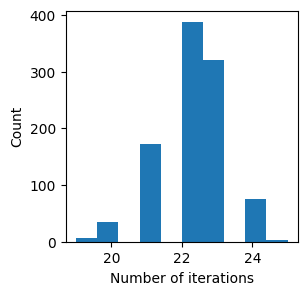

In [3]:
# Exer2


def Feb_dist(A, B):
    return np.linalg.norm(A - B)


n_exp = 1000
nIters = np.zeros((1, n_exp))

for i in range(n_exp):
    A = np.random.randn(7, 7)
    B = np.random.randn(7, 7)

    s = 1
    iter = 0
    while Feb_dist(s * A, s * B) > 1:
        s *= 0.9
        iter += 1
    nIters[0, i] = iter

_, axs = plt.subplots(figsize=(3, 3))
axs = plt.hist(nIters[0, :])
axs = plt.xlabel("Number of iterations")
axs = plt.ylabel("Count")
plt.show()

In [4]:
# Exer3
def Feb_norm(A):
    norm_1 = np.sqrt(np.sum(A**2))
    norm_2 = np.linalg.norm(A)
    norm_3 = np.sqrt(np.sum(np.diag(A.T @ A)))
    print(np.around([norm_1, norm_2, norm_3], 2))
    if abs(norm_1 - norm_2) < 0.000001 and abs(norm_1 - norm_3) < 0.000001:
        return True
    else:
        return False


A = np.random.randn(10, 10)
Feb_norm(A)

[9.9 9.9 9.9]


True

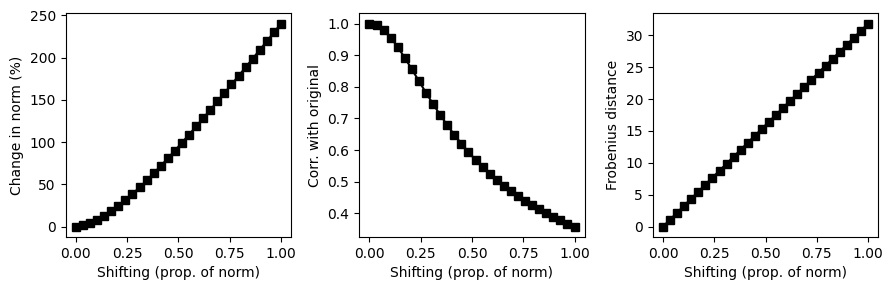

In [5]:
# Exer4
N = 10
A = np.random.randn(N, N)
norm_A = np.linalg.norm(A)

scalars = np.linspace(0, 1, 30)
shiftingResults = np.zeros((scalars.shape[0], 3))
resultsNames = ["Change in norm (%)", "Corr. with original", "Frobenius distance"]


for i in range(len(scalars)):
    As = A + scalars[i] * norm_A * np.eye(N)
    shiftingResults[i, 0] = (np.linalg.norm(As) - norm_A) * 100 / norm_A
    shiftingResults[i, 2] = Feb_dist(A, As)
    shiftingResults[i, 1] = np.corrcoef(A.flatten(), As.flatten())[0, 1]


_, axs = plt.subplots(1, 3, figsize=(9, 3))

for i in range(3):

    # plot the results
    axs[i].plot(scalars, shiftingResults[:, i], "ks-")
    axs[i].set_xlabel("Shifting (prop. of norm)")
    axs[i].set_ylabel(resultsNames[i])

plt.tight_layout()
plt.show()

In [6]:
# Exer5 - Creating a random marix MxN with constat rank r
M = 5
N = 8
r = 3


def r_Rank_matrix(M, N, r):
    A = np.random.randn(M, r) @ np.random.randn(r, N)
    return A, np.linalg.matrix_rank(A)


A, rank = r_Rank_matrix(M, N, r)
print(A.shape)
print(rank)

(5, 8)
3


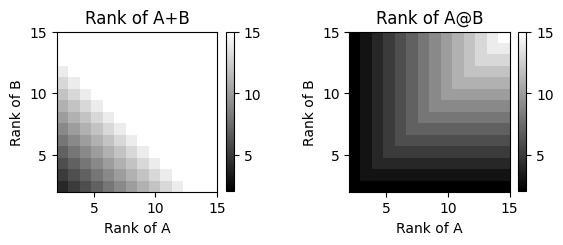

In [7]:
# Exer 7
matSize = 20  # matrix size (square)
rs = range(2, 16)  # range of ranks

Ranks = np.zeros((len(rs), len(rs), 2))

for i in range(len(rs)):
    for j in range(len(rs)):
        # create the matrices
        S = (
            r_Rank_matrix(matSize, matSize, rs[i])[0]
            + r_Rank_matrix(matSize, matSize, rs[j])[0]
        )
        M = (
            r_Rank_matrix(matSize, matSize, rs[i])[0]
            @ r_Rank_matrix(matSize, matSize, rs[j])[0]
        )

        # compute their ranks
        Ranks[i, j, 0] = np.linalg.matrix_rank(S)
        Ranks[i, j, 1] = np.linalg.matrix_rank(M)


fig, axs = plt.subplots(1, 2, figsize=(6, 3))
s = "+@"  # symbols for title

for i in range(2):

    # draw heatmat
    h = axs[i].imshow(
        Ranks[:, :, i],
        vmin=np.min(rs),
        vmax=np.max(rs),
        origin="lower",
        extent=(rs[0], rs[-1], rs[0], rs[-1]),
        cmap="gray",
    )

    # add colorbar and other niceties
    fig.colorbar(h, ax=axs[i], fraction=0.045)
    axs[i].set_xlabel("Rank of A")
    axs[i].set_ylabel("Rank of B")
    axs[i].set_title(f"Rank of A{s[i]}B")


plt.tight_layout()
plt.show()

In [8]:
# Exer 8
A = np.random.randn(10, 5)
print(f"rank of A is {np.linalg.matrix_rank(A)}")
print(f"rank of A^T is {np.linalg.matrix_rank(A.T)}")
print(f"rank of A^TA is {np.linalg.matrix_rank(A.T@A)}")
print(f"rank of AA^T is {np.linalg.matrix_rank(A@A.T)}")

rank of A is 5
rank of A^T is 5
rank of A^TA is 5
rank of AA^T is 5


In [9]:
# Exer 9


def is_V_inColA(A, v):
    if A.shape[0] != v.shape[0]:
        raise Exception(
            "Size mismatch! A and v must have the same column dimensionality!."
        )

    # compute ranks
    rankA = np.linalg.matrix_rank(A)
    rankAv = np.linalg.matrix_rank(np.hstack((A, v)))

    # function outputs TRUE if v \in C(A)
    return rankA == rankAv


A, r = r_Rank_matrix(4, 3, 3)

v = np.random.randn(4, 1)

print(is_V_inColA(A, v))


A, r = r_Rank_matrix(4, 4, 4)

v = np.random.randn(4, 1)

print(is_V_inColA(A, v))

False
True


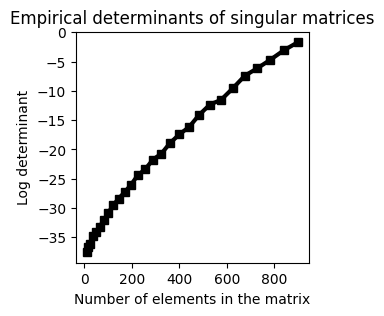

In [10]:
# Exer 10
ns = np.arange(3, 31)

# iteration
iters = 100

# initialize
dets = np.zeros((len(ns), iters))

# loop over matrix sizes
for ni in range(len(ns)):
    for i in range(iters):

        # step 1
        A = np.random.randn(ns[ni], ns[ni])

        # step 2
        A[:, 0] = A[:, 1]

        # step 3
        dets[ni, i] = np.abs(np.linalg.det(A))


# note: the number of elements in a square matrix is the columns squared


# plotting
plt.figure(figsize=(3, 3))
plt.plot(ns**2, np.log(np.mean(dets, axis=1)), "ks-", linewidth=3)
plt.xlabel("Number of elements in the matrix")
plt.ylabel("Log determinant")
plt.title("Empirical determinants of singular matrices")
plt.show()